In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#timestamp, quantity, price, fee, amount, side
trade = pd.read_csv('../Data/2018-07-trade.csv')

In [3]:
"""
- Task 2
Report how many Buy and Sell transactions separately. 
Draw a time-series bar graph illustrating changes in transaction counts 
(x-axis: 10 minutes interval, y1-axis: Sell, y2-axis: Buy)
"""

def Transaction(trade):
    start = pd.Timestamp('2018-07-01 02:10:00')
    end = pd.Timestamp('2018-07-03 00:10:00')
    transaction = {'timestamp':[], 'Sell':[], 'Buy':[]}
    i = 0

    while(end > start):
        buy = 0
        sell = 0
        while(i < len(trade) and start > pd.Timestamp(trade['timestamp'][i])):
            if trade['side'][i] == 0:
                buy += 1
            else:
                sell += 1           
            i += 1
        transaction['timestamp'].append(start)
        transaction['Sell'].append(sell)
        transaction['Buy'].append(buy)
        start = pd.Timestamp(start.value + 600000000000)
    return pd.DataFrame(transaction)

def timestamp_xticks(transaction):
    tmp = []
    for i in range(len(transaction)):
        if transaction['Buy'][i] or transaction['Sell'][i]:
            tmp.append(i)
    return tmp

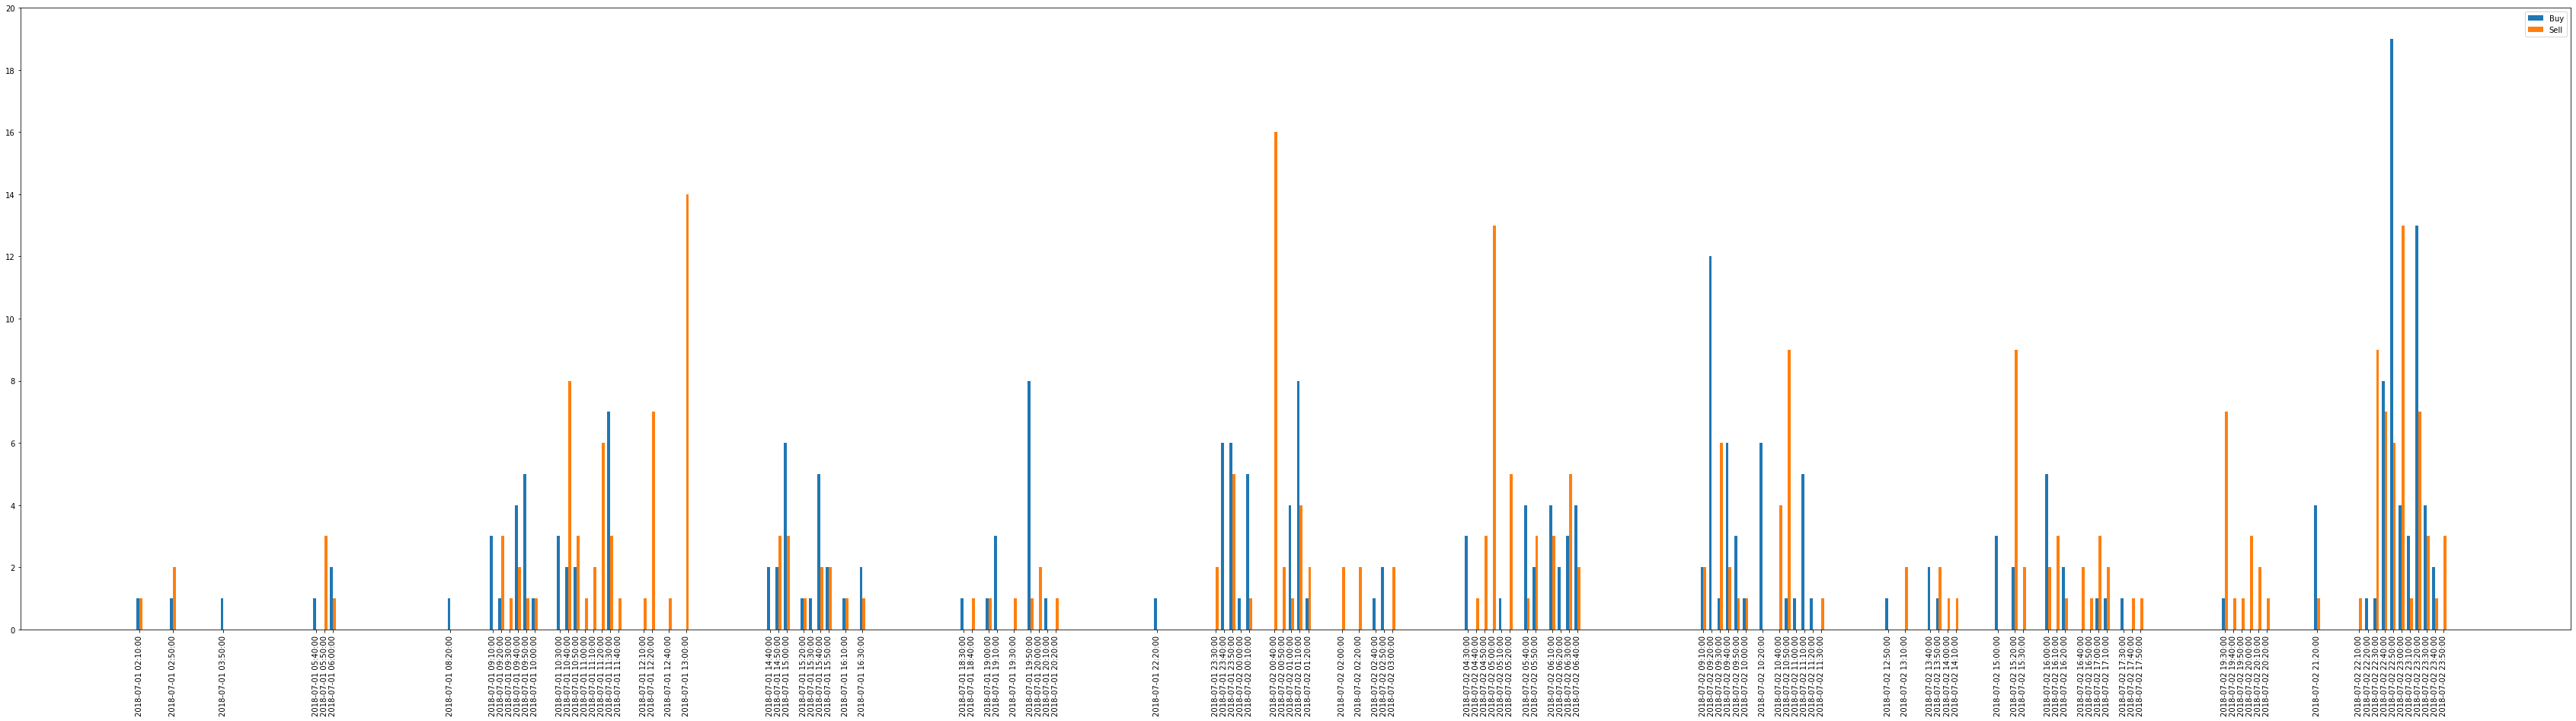

In [4]:
    transaction = Transaction(trade)

    x = np.arange(len(transaction))

    fig, ax = plt.subplots(figsize=(60, 15))
    width = 0.35
    ax.bar(x - width/2, transaction['Buy'], width, label='Buy')
    ax.bar(x + width/2, transaction['Sell'], width, label='Sell')

    arange = timestamp_xticks(transaction)
    ax.set_xticks(arange)
    ax.set_xticklabels(transaction['timestamp'][arange],rotation=90)

    ax.set_yticks(np.arange(0,22,2))
    ax.legend()

    plt.savefig('../Images/Task2_1.png', dpi = 300)

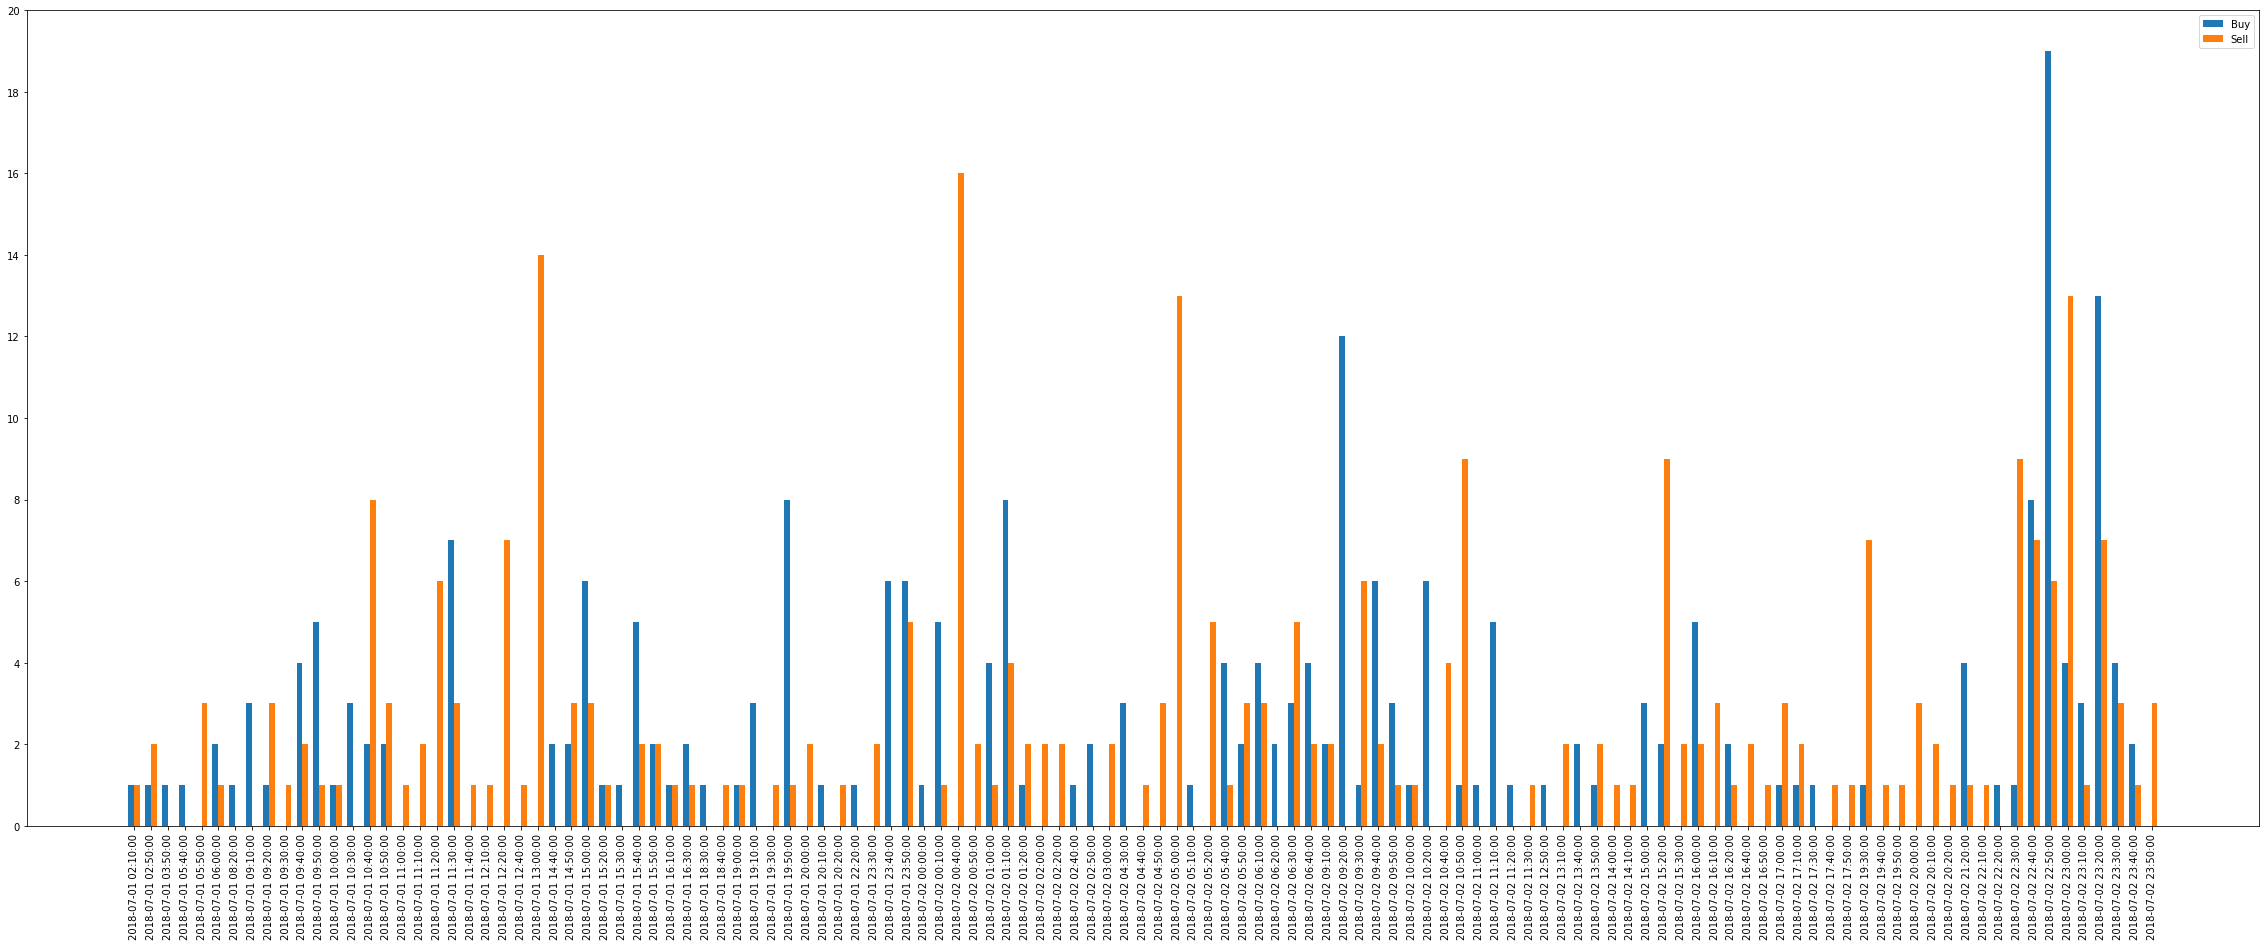

In [5]:
transaction = Transaction(trade)
arange = timestamp_xticks(transaction)
transaction = transaction.loc[timestamp_xticks(transaction)]
x = np.arange(len(transaction))  

fig, ax = plt.subplots(figsize=(40, 15))
width = 0.35
ax.bar(x - width/2, transaction['Buy'], width, label='Buy')
ax.bar(x + width/2, transaction['Sell'], width, label='Sell')

ax.set_xticks(np.arange(len(transaction)))
ax.set_xticklabels(transaction['timestamp'],rotation=90)

ax.set_yticks(np.arange(0,22,2))
ax.legend()

plt.savefig('../Images/Task2_2.png', dpi = 300)